In [1]:
# Feature extraction example
import numpy as np
import librosa
import librosa.display
% pylab inline

Populating the interactive namespace from numpy and matplotlib


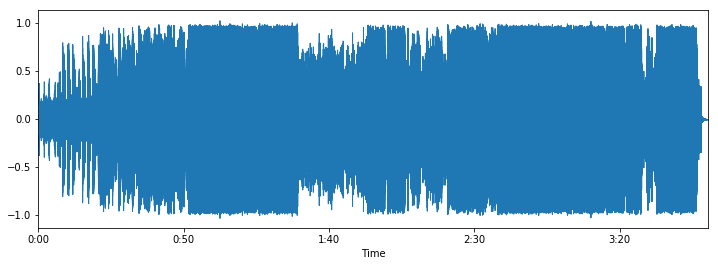

In [2]:
# Load the example clip
y, sr = librosa.load('01 - Queen - London Thumakda.mp3')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(y, sr=sr)

In [3]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

In [5]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [6]:
# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

In [7]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

In [8]:
# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

In [9]:
# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

In [10]:
# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

In [11]:
# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

In [12]:
# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])